# TIME SERIES SALES FORECASTING

## TECHNICAL GOALS
* Understand the data very well. Do all transformations / data engineering/etc. wherever applicable.
* Perform Exploratory Data Analysis(EDA).
* Carry out all the Data mining tasks.
* Identify the salient features that will determine the best results.
* Perform the model evaluation to select the appropriate algorithms.

## Preparing Data for Machine Learning

### Data Preparation

### Import the liabraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [94]:
data=pd.read_excel("Proj4_TimeSeries_Sales_Data_Project.xls",index_col='Ship Date',parse_dates=True)
data

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Ship Date,,,,,,,,,,,,,,,,,,,,
2016-11-11,1,CA-2016-152156,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-11,2,CA-2016-152156,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-16,3,CA-2016-138688,2016-06-12,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-18,4,US-2015-108966,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-18,5,US-2015-108966,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-23,9990,CA-2014-110422,2014-01-21,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-03-03,9991,CA-2017-121258,2017-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-03-03,9992,CA-2017-121258,2017-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [95]:
data=data.sort_index()

In [96]:
data

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Ship Date,,,,,,,,,,,,,,,,,,,,
2014-01-07,7181,CA-2014-106054,2014-01-06,First Class,JO-15145,Jack O'Briant,Corporate,United States,Athens,Georgia,30605,South,OFF-AR-10002399,Office Supplies,Art,"Dixon Prang Watercolor Pencils, 10-Color Set w...",12.780,3,0.0,5.2398
2014-01-07,7981,CA-2014-103800,2014-01-03,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-08,5328,CA-2014-130813,2014-01-06,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,California,90049,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.440,3,0.0,9.3312
2014-01-08,740,CA-2014-112326,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-08,741,CA-2014-112326,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-04,573,CA-2017-164826,2017-12-28,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024,East,OFF-BI-10001922,Office Supplies,Binders,Storex Dura Pro Binders,33.264,7,0.2,11.2266
2018-01-04,572,CA-2017-164826,2017-12-28,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024,East,OFF-FA-10000585,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,13.960,4,0.0,6.4216
2018-01-04,4240,CA-2017-158673,2017-12-29,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Grand Rapids,Michigan,49505,Central,OFF-PA-10000994,Office Supplies,Paper,Xerox 1915,209.700,2,0.0,100.6560


## Understanding data structure

### All columns

In [97]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### structure of dataset

In [98]:
data.shape

(9994, 20)

In [99]:
data.size

199880

### Summary of dataset

In [100]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [101]:
data.describe(include = 'object').T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Product ID,9994,1862,OFF-PA-10001970,19


### Count of each columns or feature in the data set

In [102]:
data['Row ID'].value_counts()

7181    1
5423    1
8580    1
6683    1
8667    1
       ..
5718    1
5509    1
9913    1
5345    1
5132    1
Name: Row ID, Length: 9994, dtype: int64

In [103]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [104]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [105]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [106]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [107]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [108]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [109]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [110]:
data['Quantity'].value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [111]:
data['Postal Code'].value_counts()

10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
60004      1
82001      1
77301      1
93405      1
6810       1
Name: Postal Code, Length: 631, dtype: int64

In [112]:
data['Product ID'].value_counts()

OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10002049    15
TEC-AC-10003628    15
                   ..
TEC-PH-10004830     1
OFF-PA-10001661     1
OFF-AP-10003914     1
FUR-TA-10001691     1
OFF-FA-10000089     1
Name: Product ID, Length: 1862, dtype: int64

In [113]:
data['Discount'].value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

In [114]:
data['Profit'].value_counts()

 0.0000      65
 6.2208      43
 9.3312      38
 3.6288      32
 5.4432      32
             ..
 30.7860      1
 3.6784       1
-161.6940     1
 20.3880      1
 37.4144      1
Name: Profit, Length: 7545, dtype: int64

In [115]:
data['Sales'].value_counts()

12.960     56
19.440     39
15.552     39
10.368     36
32.400     28
           ..
349.950     1
54.992      1
181.797     1
236.500     1
101.120     1
Name: Sales, Length: 6144, dtype: int64

In [116]:
data['Product Name'].value_counts()

Staple envelope                                                              48
Easy-staple paper                                                            46
Staples                                                                      46
Avery Non-Stick Binders                                                      20
Staples in misc. colors                                                      19
                                                                             ..
Avery 484                                                                     1
Cisco SPA525G2 5-Line IP Phone                                                1
Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops             1
RCA H5401RE1 DECT 6.0 4-Line Cordless Handset With Caller ID/Call Waiting     1
Acco Glide Clips                                                              1
Name: Product Name, Length: 1850, dtype: int64

### Checking for null values

In [117]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### We do not have any null values in the dataset so we do not require null value treatment.

In [118]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### Dropping the columns or features which is not directly contributing to the target variable that is sales

In [81]:
data.drop(['Product Name'],axis=1,inplace=True)

In [119]:
data.head()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Ship Date,,,,,,,,,,,,,,,,,,,,
2014-01-07,7181,CA-2014-106054,2014-01-06,First Class,JO-15145,Jack O'Briant,Corporate,United States,Athens,Georgia,30605,South,OFF-AR-10002399,Office Supplies,Art,"Dixon Prang Watercolor Pencils, 10-Color Set w...",12.780,3,0.0,5.2398
2014-01-07,7981,CA-2014-103800,2014-01-03,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-08,5328,CA-2014-130813,2014-01-06,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,California,90049,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.440,3,0.0,9.3312
2014-01-08,740,CA-2014-112326,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-08,741,CA-2014-112326,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748


In [120]:
data.shape

(9994, 20)

## scaling of the data for better comparision

### Correlation

In [128]:
data.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [129]:
corr=data.corr()
corr.style.background_gradient(cmap='Accent')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [130]:
x=data.corr()

<AxesSubplot:>

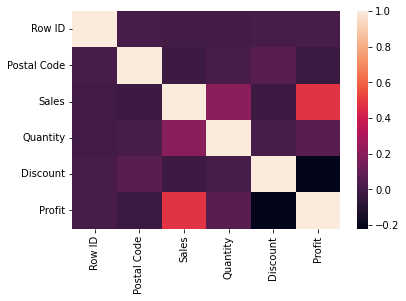

In [132]:
import seaborn as sns

sns.heatmap(x)

#### As we can see from the heatmap that the most correlated factor is sales which is going to affected by discount and profit.

## Dropping the features which is directcly not correlated with the sales.

In [134]:
data.sample()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Ship Date,,,,,,,,,,,,,,,,,,,,
2015-04-30,2899,US-2015-114839,2015-04-26,Standard Class,PW-19240,Pierre Wener,Consumer,United States,Houston,Texas,77036,Central,FUR-CH-10004086,Furniture,Chairs,Hon 4070 Series Pagoda Armless Upholstered Sta...,408.422,2,0.3,-5.8346


In [136]:
data1=data[['Sales','Quantity','Discount','Profit','Postal Code','Row ID']]


In [137]:
data1.head()

,Sales,Quantity,Discount,Profit,Postal Code,Row ID
Ship Date,,,,,,
2014-01-07,12.780,3,0.0,5.2398,30605,7181
2014-01-07,16.448,2,0.2,5.5512,77095,7981
2014-01-08,19.440,3,0.0,9.3312,90049,5328
2014-01-08,11.784,3,0.2,4.2717,60540,740
2014-01-08,272.736,3,0.2,-64.7748,60540,741


In [139]:
data1.shape

(9994, 6)

In [146]:
data1=data1.sort_index()

In [147]:
data1=data1.resample('M').sum()

In [149]:
data1.head()

,Sales,Quantity,Discount,Profit,Postal Code,Row ID
Ship Date,,,,,,
2014-01-31,13275.131,269,9.45,2424.1125,3867003,315561
2014-02-28,5406.528,163,8.05,866.1925,3286832,282361
2014-03-31,50708.349,527,23.15,123.4122,7299293,777311
2014-04-30,30388.465,543,17.20,3313.2568,8196915,723330
2014-05-31,22478.880,468,18.65,2636.2171,6523166,597786


### Performing EDA(Univariate) 

In [158]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {data1[col].mean()}")
    print(f"The median of the {col} is {data1[col].median()}")
    print(f"The mode of the {col} is {data1[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {data1[col].std()}")
    print(f"Number of missing values in the {col} is {data1[col].isnull().sum()}")

In [179]:
info_of_cat("Postal Code")

Unique values in Postal Code are: [ 3867003  3286832  7299293  8196915  6523166  6932372  9057048  8687681
 13462620 10069802 17569716 15615366  5275567  3608529  6900085  8113357
  7760183  7785833  6705688  7204843 13966354 10137856 16359976 18653124
  4849364  4445565  8038377  8410190  9180844 12685429 10747035  9564308
 19725317 11967735 20509932 20346811  9897570  7414071 13575510  9651367
 13910071 13722560 11371683 13882058 24944886 16448214 25697985 25008752
  2537809]
Mode of Postal Code is 2537809
Number of missing values in Postal Code is 0


In [159]:
info_of_cat("Sales")

Unique values in Sales are: [ 13275.131    5406.528   50708.349   30388.465   22478.88    35991.6556
  32990.594   30245.242   73126.6533  35741.477   80182.1947  59848.0235
  29594.7606  12679.077   39269.662   25515.2535  32587.9535  29850.83
  30400.227   28116.3142  69615.835   32575.7155  70634.85    78602.0237
  19130.057   26954.085   48795.91    41028.298   46520.184   48272.722
  37595.947   32031.5793  70460.8006  60858.1993  74664.1848 105013.786
  42297.044   23506.7824  52891.385   40021.6803  44774.9324  47220.4981
  47183.873   63760.02    91427.867   75551.6612 105200.513   97053.459
   5159.6968]
Mode of Sales is 5159.6968
Number of missing values in Sales is 0


In [160]:
info_of_cat("Quantity")

Unique values in Quantity are: [ 269  163  527  543  468  506  564  621  913  615 1198  978  421  237
  498  491  546  571  579  522 1086  617 1241 1300  401  328  540  668
  688  879  761  616 1337  779 1398 1428  613  403  822  726  907  880
  858  893 1664 1111 1765 1783  151]
Mode of Quantity is 151
Number of missing values in Quantity is 0


In [161]:
info_of_cat("Discount")

Unique values in Discount are: [ 9.45  8.05 23.15 17.2  18.65 21.42 27.65 18.7  40.62 27.35 46.47 49.85
 16.82  8.   17.94 25.65 26.65 24.   22.87 38.9  28.35 48.24 47.92 12.3
  9.7  29.22 27.3  36.3  33.8  29.15 29.17 55.17 32.32 54.27 47.52 29.2
 20.77 28.3  37.79 37.39 43.59 32.5  29.9  67.05 52.32 73.29 65.6   7.62]
Mode of Discount is 25.650000000000002
Number of missing values in Discount is 0


In [162]:
info_of_cat("Profit")

Unique values in Profit are: [ 2424.1125   866.1925   123.4122  3313.2568  2636.2171  5316.866
 -1047.8993  6161.5346  6835.8856  4567.7754  9415.3468  6680.0253
 -1455.5695  3158.6857  9762.9141  1558.4     5562.9605  5222.5484
  2940.2336  3650.4602  8713.5774  3601.8    12362.3376  7803.1819
  3445.7653  5274.3035  3718.0314  2831.8084  6356.6381  6663.7107
  4801.1517  2076.1467  9359.3231 15629.3249 11669.3287 11115.5692
  6359.2081  2058.036  13157.4265  2678.0235  5910.0197  7195.1466
  6639.3986 10155.059  11237.4753  8825.8434  8689.7765  9441.462
   934.7894]
Mode of Profit is -1455.569500000001
Number of missing values in Profit is 0


## Visualization

### Histogram of all numerical features

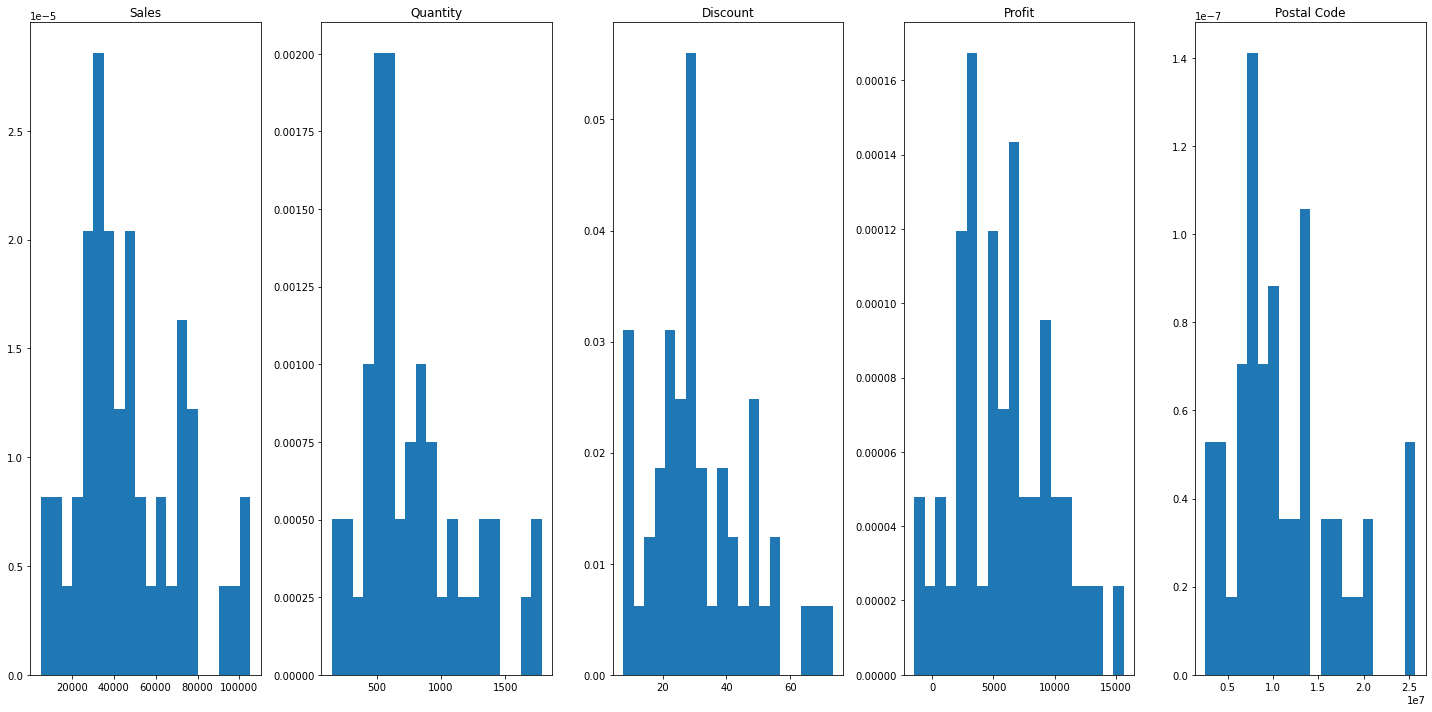

In [163]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = data1.select_dtypes(include=numerics)
numeric_cols=data1.columns
num_cols=5
n_bins = 20

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(data1[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

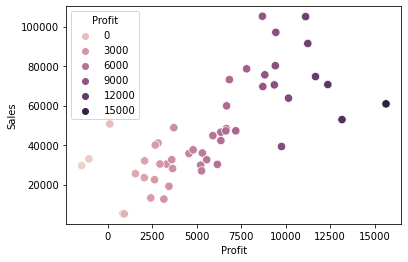

In [180]:
sns.scatterplot(x=data1.Profit,y=data1.Sales,hue=data1.Profit,s=70)

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

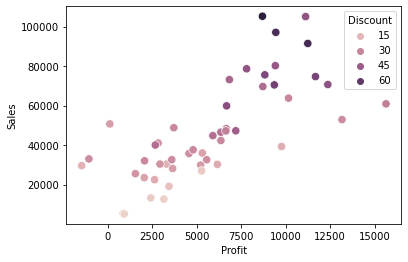

In [175]:
sns.scatterplot(x=data1.Profit,y=data1.Sales,hue=data1.Discount,s=70)

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

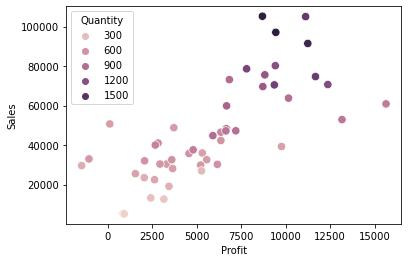

In [176]:
sns.scatterplot(x=data1.Profit,y=data1.Sales,hue=data1.Quantity,s=70)

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

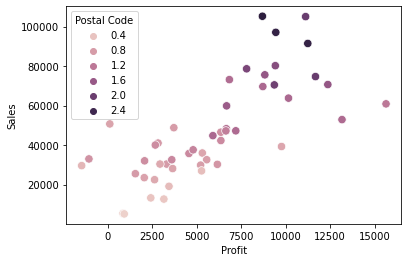

In [178]:
sns.scatterplot(x=data1.Profit,y=data1.Sales,hue=data1['Postal Code'],s=70)

<AxesSubplot:xlabel='Ship Date'>

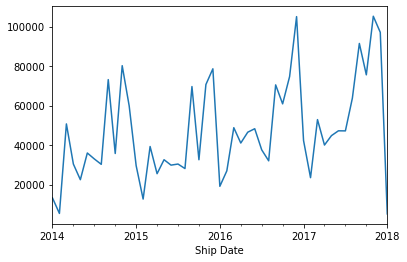

In [148]:
data1.Sales.plot()

<AxesSubplot:xlabel='Ship Date'>

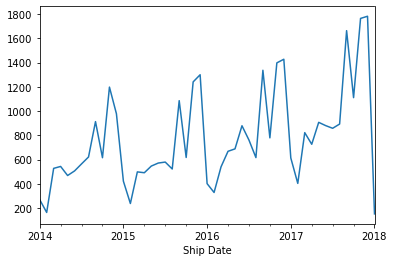

In [151]:
data1.Quantity.plot()

<AxesSubplot:xlabel='Ship Date'>

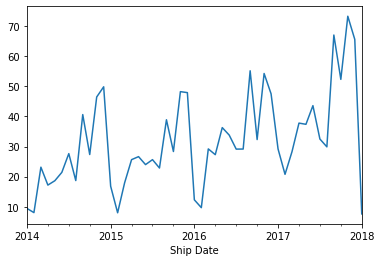

In [152]:
data1.Discount.plot()

<AxesSubplot:xlabel='Ship Date'>

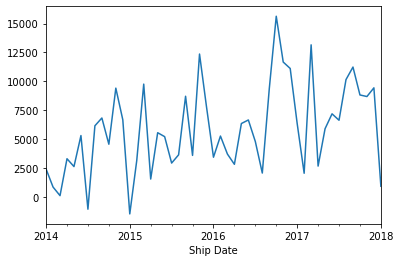

In [153]:
data1.Profit.plot()

## Characteristics of Time series

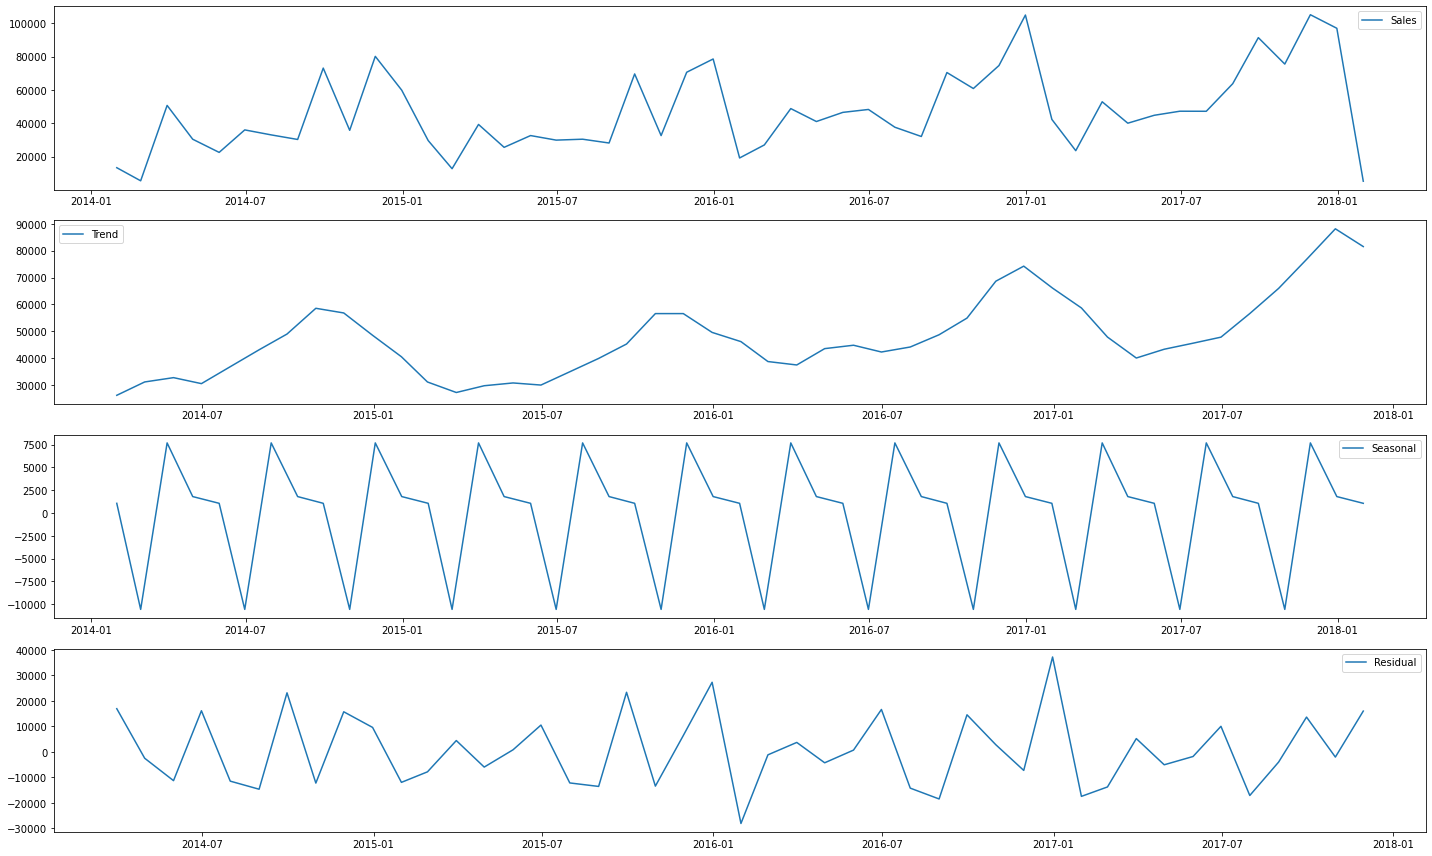

In [150]:
# different components of the Time series data
# period = 4 since the data is quaterly

decomposition=seasonal_decompose(data1.Sales, period=4)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(data1.Sales,label='Sales')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

#### We can observe from the  above graph that the data has trend and is also seasonal.

## Checking  the  Stationarity

In [187]:
# ADF test to determine data stationarity( Augmented Dicky fuler)
def checkStationarity(data1):
    pvalue = adfuller(data1)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [186]:
checkStationarity(data1.Sales)

'pvalue=0.9569077650542344. Data is not Stationary. Make the data stationary before model building'

#### We are doing ADF test that is augumented dicky fuller test to check the stionarity of the data.

#### The data is not stationary So,  we have need to make the data stationary to proceed for further process and model building.

## Differencing the data

In [193]:
data1['diff_sales']=diff(data1.Sales,k_diff=5)
data1.head()

,Sales,Quantity,Discount,Profit,Postal Code,Row ID,diff_sales
Ship Date,,,,,,,
2014-01-31,13275.131,269,9.45,2424.1125,3867003,315561,NaN
2014-02-28,5406.528,163,8.05,866.1925,3286832,282361,NaN
2014-03-31,50708.349,527,23.15,123.4122,7299293,777311,NaN
2014-04-30,30388.465,543,17.20,3313.2568,8196915,723330,NaN
2014-05-31,22478.880,468,18.65,2636.2171,6523166,597786,NaN


## Checking the  stationarity in differenced data

In [190]:
checkStationarity(data1.diff_sales.dropna())

'pvalue=0.004033506394933983. Data is Stationary. Proceed to model building'

#### The differenced data is now satationary so we can build the model for the sales forecasting.

## Plotting  ACF(Autocorrelation factor) and PACF(Partial auto-correlation factor)

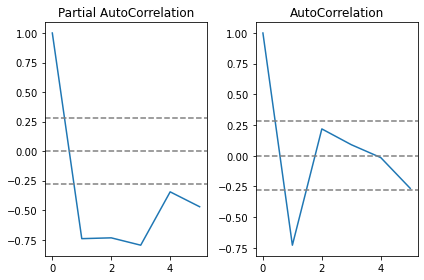

In [195]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(data1['diff_sales'].dropna(), nlags=5)
lag_pacf = pacf(data1['diff_sales'].dropna(), nlags=5, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data1)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(data1)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data1)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(data1)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

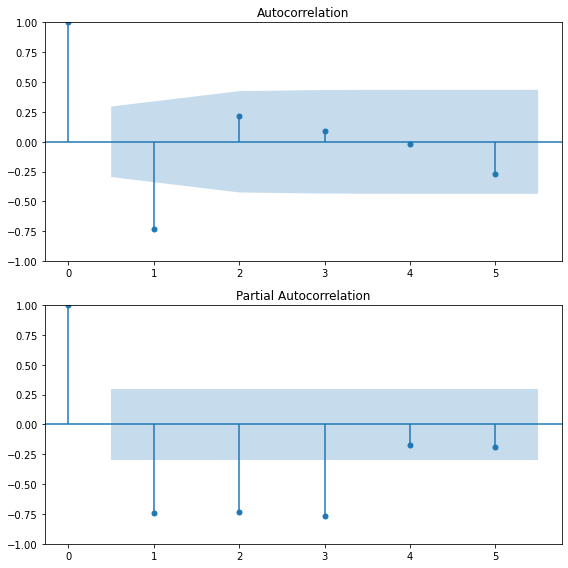

In [196]:
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(211)
sm.graphics.tsa.plot_acf(data1.diff_sales.dropna(),lags=5,ax=ax1)
ax2=fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(data1.diff_sales.dropna(),lags=5,ax=ax2)
plt.tight_layout()

#### Fromt the above graphs we can observe that the good value of p from Autocorrelation(ACF)  is 2 and value of q from Partial autocorrelation(PACF) is also 2

## ARIMA MODEL

### Using  AUTO ARIMA for selection of p, d, q

In [197]:
# auto ARIMA (to help in the selection of p,d,q)
m1 = auto_arima(data1['diff_sales'].dropna(),start_p=0,max_p=5, start_q=0,max_q=5, seasonal=False, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1220.876, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1188.219, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1157.033, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1116.739, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1113.732, Time=0.04 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1105.691, Time=0.06 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1092.527, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1100.315, Time=0.07 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=1093.045, Time=0.18 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1086.843, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1086.672, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1113.274, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1101.554, Time=0.07 sec
 ARIMA(3,0,3)(0,0,0)[0]             : 

#### From AUTO ARIMA the is Best model: ARIMA(3,0,1)(0,0,0)[0]             : AIC=1101.554, Time=0.07 secbased on the least AIC value
* THe lowest value for AIC ids considered to be good for the model.

## Building  the ARIMA model

In [199]:
# start with initial values for p and q based on auto_arima recommendation
p=3; d=0; q=1
m1 = ARIMA(data1['diff_sales'],order=(p,d,q)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:             diff_sales   No. Observations:                   49
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -553.754
Date:                Fri, 25 Nov 2022   AIC                           1119.509
Time:                        12:35:43   BIC                           1130.860
Sample:                    01-31-2014   HQIC                          1123.815
                         - 01-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3623.9524   1773.043     -2.044      0.041   -7099.052    -148.853
ar.L1         -1.7349      0.168    -10.348      0.000      -2.064      -1.406
ar.L2         -1.5674      0.211     -7.413      0.0

### Predicting  the test data using the model

In [200]:
# predictions


predictions = m1.predict()
print(predictions)


Ship Date
2014-01-31     -3623.952426
2014-02-28     -3623.952426
2014-03-31     -3623.952426
2014-04-30     -3623.952426
2014-05-31     -3623.952426
2014-06-30     -3623.952426
2014-07-31    191525.994894
2014-08-31    158749.923861
2014-09-30    -43224.405355
2014-10-31   -152956.729634
2014-11-30    320061.748541
2014-12-31   -539001.471329
2015-01-31    453630.449816
2015-02-28   -296902.851122
2015-03-31    -40054.383233
2015-04-30    -91310.681471
2015-05-31    298797.561949
2015-06-30   -287878.163936
2015-07-31     47420.042076
2015-08-31    -89809.346896
2015-09-30     26295.393463
2015-10-31   -152757.773425
2015-11-30    323100.652641
2015-12-31   -538652.884810
2016-01-31    358985.321578
2016-02-29    -30872.829213
2016-03-31   -407169.440590
2016-04-30    206551.905201
2016-05-31    137377.049260
2016-06-30   -196722.498027
2016-07-31    -36459.746921
2016-08-31       413.634444
2016-09-30    -65143.335772
2016-10-31   -106979.882439
2016-11-30    259726.466578
2016-12-31

### Converting the forcasted values in the dataframe

In [201]:
forecast=pd.DataFrame(m1.forecast(16))  #the forecast values for the future 16 quaters which is next 4 years
forecast

,predicted_mean
2018-02-28,-2269.809059
2018-03-31,-131750.893086
2018-04-30,74034.172934
2018-05-31,61569.970425
2018-06-30,-152883.570484
2018-07-31,101279.585652
2018-08-31,4789.024947
2018-09-30,-82964.151278
2018-10-31,50778.198195
2018-11-30,20733.459254


### Adding the predicted value to the dataframe 

In [202]:
data1['predicted_values']=predictions

In [203]:
data1.head()

,Sales,Quantity,Discount,Profit,Postal Code,Row ID,diff_sales,predicted_values
Ship Date,,,,,,,,
2014-01-31,13275.131,269,9.45,2424.1125,3867003,315561,NaN,-3623.952426
2014-02-28,5406.528,163,8.05,866.1925,3286832,282361,NaN,-3623.952426
2014-03-31,50708.349,527,23.15,123.4122,7299293,777311,NaN,-3623.952426
2014-04-30,30388.465,543,17.20,3313.2568,8196915,723330,NaN,-3623.952426
2014-05-31,22478.880,468,18.65,2636.2171,6523166,597786,NaN,-3623.952426


## Graph for actual vs predicted sales

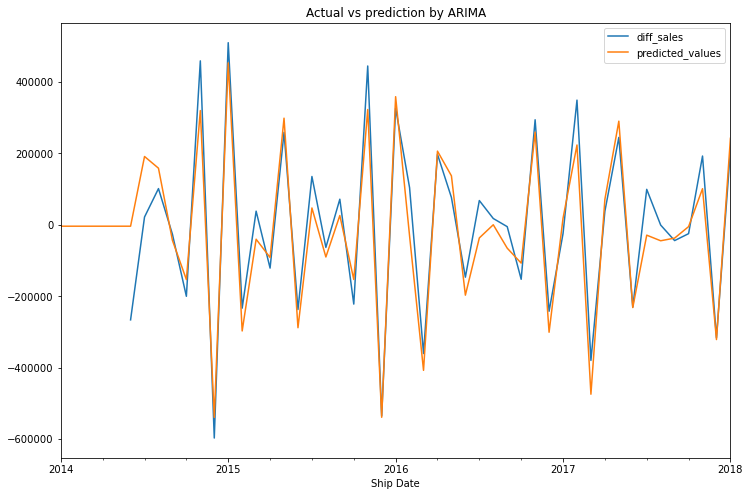

In [204]:
data1[['diff_sales','predicted_values']].plot(figsize=(12,8))    
plt.title("Actual vs prediction by ARIMA")
plt.show()

### Box-Jenkins test to check model's goodness

In [205]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### Root Mean Square Error(RMSE)

In [217]:
data1['error']=data1.Sales-data1.predicted_values

In [219]:
data1.head()

,Sales,Quantity,Discount,Profit,Postal Code,Row ID,diff_sales,predicted_values,error
Ship Date,,,,,,,,,
2014-01-31,13275.131,269,9.45,2424.1125,3867003,315561,NaN,-3623.952426,16899.083426
2014-02-28,5406.528,163,8.05,866.1925,3286832,282361,NaN,-3623.952426,9030.480426
2014-03-31,50708.349,527,23.15,123.4122,7299293,777311,NaN,-3623.952426,54332.301426
2014-04-30,30388.465,543,17.20,3313.2568,8196915,723330,NaN,-3623.952426,34012.417426
2014-05-31,22478.880,468,18.65,2636.2171,6523166,597786,NaN,-3623.952426,26102.832426


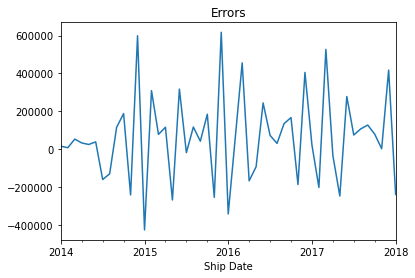

In [220]:
data1.error.plot()
plt.title("Errors")
plt.show()

In [222]:
final=m1.predict(start=len(data1)-1,end=len(data1)+8,typ='levels')
final

2018-01-31    242582.151767
2018-02-28     -2269.809059
2018-03-31   -131750.893086
2018-04-30     74034.172934
2018-05-31     61569.970425
2018-06-30   -152883.570484
2018-07-31    101279.585652
2018-08-31      4789.024947
2018-09-30    -82964.151278
2018-10-31     50778.198195
Freq: M, Name: predicted_mean, dtype: float64

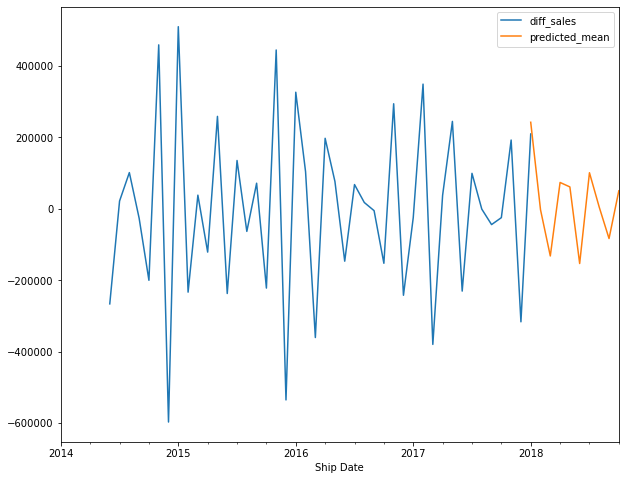

In [223]:
data1['diff_sales'].plot(figsize=(10,8),legend=True)
final.plot(legend=True)
plt.show()

## SARIMA MODEL

### Building the SARIMA model

In [225]:
# for seasonal data, use the SARIMAX. start with initial values for p,d,q
p=3; d=0; q=1
m1 = sm.tsa.statespace.SARIMAX(data1['diff_sales'],order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
m1

### Predicting  the values

In [227]:
# predict
predictions = m1.predict()
predictions

Ship Date
2014-01-31         0.000000
2014-02-28         0.000000
2014-03-31         0.000000
2014-04-30         0.000000
2014-05-31         0.000000
2014-06-30         0.000000
2014-07-31    207193.726529
2014-08-31    165361.191337
2014-09-30    -27620.696123
2014-10-31   -123715.910846
2014-11-30    366552.853722
2014-12-31   -527304.199039
2015-01-31    507136.276031
2015-02-28   -285886.172360
2015-03-31      5977.797087
2015-04-30    -94705.437272
2015-05-31    306523.278889
2015-06-30   -218216.668171
2015-07-31    103004.833876
2015-08-31    -74437.183309
2015-09-30     49274.315793
2015-10-31   -173488.165761
2015-11-30    421788.271260
2015-12-31   -553706.603340
2016-01-31    395014.417957
2016-02-29     41182.904657
2016-03-31   -373946.824564
2016-04-30    204164.538889
2016-05-31    117211.407197
2016-06-30   -144226.332036
2016-07-31     48392.618687
2016-08-31     15135.000708
2016-09-30    -32007.087158
2016-10-31   -141548.029503
2016-11-30    337615.969288
2016-12-31

### Collate actual, predicted and errors together

In [232]:
data1['predicted_values_SARIMA']=predictions

In [233]:
data1

,Sales,Quantity,Discount,Profit,Postal Code,Row ID,diff_sales,predicted_values,error,predicted_values_SARIMA,predicted_value_SARIMA
Ship Date,,,,,,,,,,,
2014-01-31,13275.1310,269,9.45,2424.1125,3867003,315561,NaN,-3623.952426,16899.083426,0.000000,0.000000
2014-02-28,5406.5280,163,8.05,866.1925,3286832,282361,NaN,-3623.952426,9030.480426,0.000000,0.000000
2014-03-31,50708.3490,527,23.15,123.4122,7299293,777311,NaN,-3623.952426,54332.301426,0.000000,0.000000
2014-04-30,30388.4650,543,17.20,3313.2568,8196915,723330,NaN,-3623.952426,34012.417426,0.000000,0.000000
2014-05-31,22478.8800,468,18.65,2636.2171,6523166,597786,NaN,-3623.952426,26102.832426,0.000000,0.000000
2014-06-30,35991.6556,506,21.42,5316.8660,6932372,540829,-265844.0754,-3623.952426,39615.608026,0.000000,0.000000
2014-07-31,32990.5940,564,27.65,-1047.8993,9057048,739789,22071.6830,191525.994894,-158535.400894,207193.726529,207193.726529
2014-08-31,30245.2420,621,18.70,6161.5346,8687681,725040,101654.0040,158749.923861,-128504.681861,165361.191337,165361.191337
2014-09-30,73126.6533,913,40.62,6835.8856,13462620,1225465,-26104.2377,-43224.405355,116351.058655,-27620.696123,-27620.696123


### Graph for actual vs predicted sales

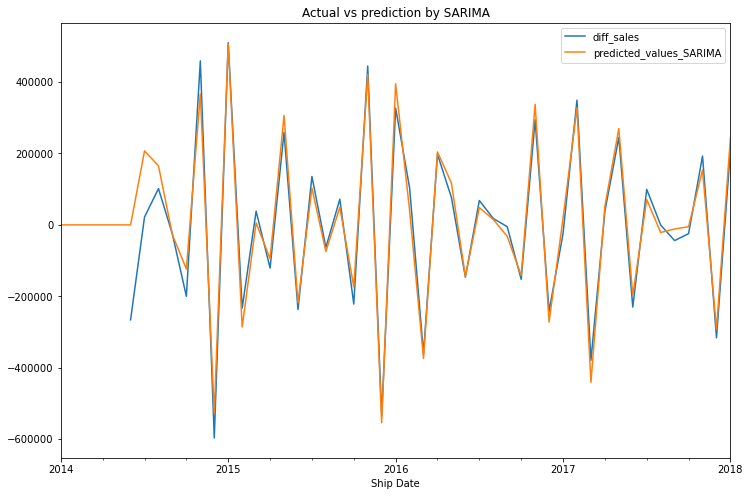

In [234]:
data1[['diff_sales','predicted_values_SARIMA']].plot(figsize=(12,8))    
plt.title("Actual vs prediction by SARIMA")
plt.show()

### Forecasting the future sales using the model

In [236]:
frcast = m1.predict(start=len(data1), end=len(data1)+11, typ='levels').rename('Forecast')

<AxesSubplot:xlabel='Ship Date'>

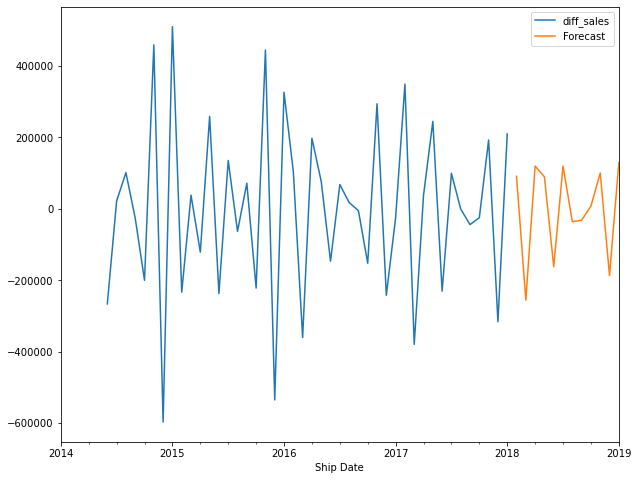

In [237]:
data1['diff_sales'].plot(figsize=(10,8),legend=True)
frcast.plot(legend=True)